In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
import pandas as  pd
from pandas import DataFrame

In [2]:
# read and turn it into float  
pts = []
with open('Data.txt', "r") as file:
    for readline in file:
        line_strip = readline.strip() # removing \n
        point = line_strip.split('\t') # removing \t
        pts.append(point)
data = np.array(pts)   
data=data.astype(float)
data

array([[ 1.9626e+01,  2.1089e+01],
       [ 1.8548e+01,  2.1785e+01],
       [ 1.9381e+01,  1.9696e+01],
       [ 2.0935e+01,  1.9991e+01],
       [ 2.1056e+01,  2.0507e+01],
       [ 2.0160e+01,  2.1203e+01],
       [ 2.0287e+01,  2.0522e+01],
       [ 2.0633e+01,  2.0397e+01],
       [ 1.8541e+01,  1.9517e+01],
       [ 1.9418e+01,  1.9769e+01],
       [ 1.8170e+01,  2.0613e+01],
       [ 1.9551e+01,  2.1683e+01],
       [ 2.0949e+01,  2.0568e+01],
       [ 2.0717e+01,  1.8794e+01],
       [ 2.2288e+01,  2.0433e+01],
       [ 2.0167e+01,  1.9908e+01],
       [ 1.7844e+01,  1.9756e+01],
       [ 2.1689e+01,  1.9781e+01],
       [ 2.1282e+01,  1.9120e+01],
       [ 1.9417e+01,  1.9679e+01],
       [ 2.0223e+01,  1.9216e+01],
       [ 2.0779e+01,  1.9635e+01],
       [ 2.0385e+01,  2.0117e+01],
       [ 2.0696e+01,  2.0174e+01],
       [ 1.9887e+01,  1.9784e+01],
       [ 1.9961e+01,  1.9847e+01],
       [ 2.0088e+01,  2.0034e+01],
       [ 1.9210e+01,  2.0458e+01],
       [ 2.1423e+01,

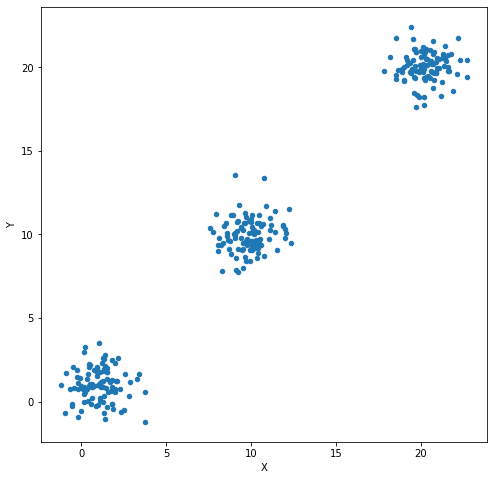

In [3]:
df=DataFrame(dict(x=data[:,0],y=data[:,1]))
fig,ax =plt.subplots(figsize=(8,8))
df.plot (ax=ax , kind ='scatter',x='x',y='y')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [4]:
Random_point= random.choices(data)
print(Random_point )

[array([20.287, 20.522])]


In [5]:
#centriod of points take random of two and append to array as cordinate of a point
#return this array 3 points which have two cordinate 
def init_centriod(k,x):
    arr=[]
    for i in range (k):
        cx= np.random.uniform(min(x[:,0]), max(x[:,0]))
        cy= np.random.uniform(min(x[:,1]), max(x[:,1]))
        arr.append([cx,cy])
    return np.asarray(arr)


In [6]:
def distance_cs (a,b):
    return np.sqrt(sum(np.square(a-b)))




In [7]:
#method to assign cluster take k and data and array of centriod 
#make array for dist and assign point to the nearast distance and which centriod near to the point  to the cluster
def assign_cluster (k,x,cg):
    cluster =[-1]*len(x)
    for i in range (len(x)):
        dist_array=[]
        for j in range (k):
            dist_array.append(distance_cs(x[i], cg[j]))
        idx=np.argmin(dist_array)
        cluster[i]=idx
    return np.asarray(cluster)                
    

                    
      
        

In [8]:
#loop over data points if current point belong to cluster append point to array
# we will have array of point to this cluster 
#3 centriod
def compute_centriod (k,x,cluster):
    cg_arr=[]
    for i in range(k):
        arr =[]
        for j in range (len(x)):
            if cluster[j]==i:
                arr.append(x[j])
        cg_arr.append(np.mean(arr,axis=0))
    return np.asarray(cg_arr)


In [9]:
# when we stop calculating distance between old and new centriod 
def measure_change (cg_prev , cg_new):
    res=0
    for a,b in zip (cg_prev , cg_new):
         res+=distance_cs(a,b)
    return res         
    

In [10]:
def show_cluster(x,cluster,cg):
    df = DataFrame(dict(x=x[:,0], y=x[:,1],label=cluster))
    colors={0:'blue',1:'orange',2:'green'}
    fig,ax =plt.subplots(figsize=(8,8))
    grouped = df.groupby('label')
    for key,group in grouped:
        group.plot (ax=ax,kind='scatter',x='x',y='y', label=key , color=colors[key])
    ax.scatter (cg[:,0],cg[:,1], marker ='*',s=150,c='#000000')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.show()    

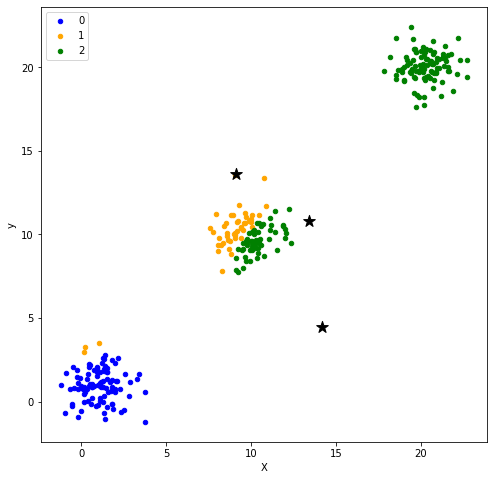

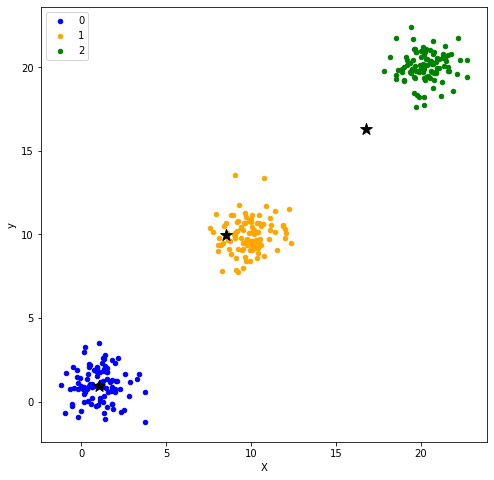

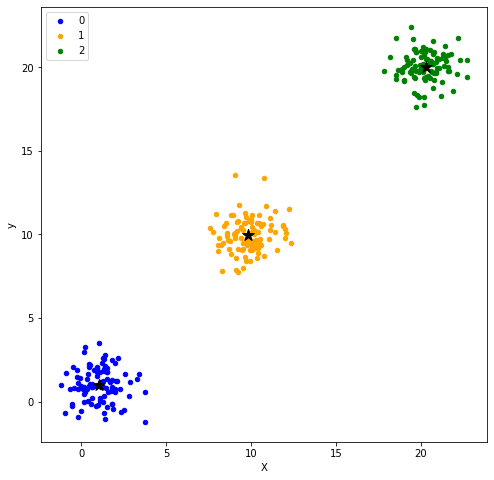

In [13]:
def k_means(k,x):
    cg_prev = init_centriod(k,x)
    cluster=[0]*len(x)
    cg_change=100
    while cg_change>.001:
        cluster = assign_cluster(k,x,cg_prev)
        show_cluster (x,cluster,cg_prev)
        cg_new = compute_centriod(k,x,cluster)
        cg_change = measure_change (cg_new , cg_prev)
        cg_prev= cg_new
    return cluster 
cluster=k_means(3,data)        

In [14]:
pts = []
with open('Data2.txt', "r") as file:
    for readline in file:
        line_strip = readline.strip() # removing \n
        point = line_strip.split('\t') # removing \t
        pts.append(point)
data_2 = np.array(pts)   
data_2=data_2.astype(float)
data_2

array([[ 0.83512 ,  1.6277  ],
       [ 2.0933  ,  2.1093  ],
       [ 0.13635 ,  1.0774  ],
       [-0.21412 , -0.1135  ],
       [ 0.99315 ,  2.5326  ],
       [ 0.23033 ,  1.3714  ],
       [ 0.77442 ,  2.1174  ],
       [-0.089064,  1.0326  ],
       [ 1.5525  ,  2.1006  ],
       [ 2.5442  ,  1.0859  ],
       [ 8.5084  ,  9.2577  ],
       [ 8.9384  , 12.35    ],
       [ 9.3844  , 10.748   ],
       [ 9.8076  , 10.889   ],
       [ 9.2352  ,  8.5977  ],
       [ 8.5776  , 10.488   ],
       [ 9.8226  ,  9.8039  ],
       [11.419   , 10.292   ],
       [10.198   , 11.588   ],
       [ 9.1955  , 10.697   ],
       [20.835   , 19.756   ],
       [20.216   , 18.834   ],
       [18.852   , 20.105   ],
       [20.722   , 22.585   ],
       [19.333   , 20.187   ],
       [19.918   , 18.067   ],
       [19.561   , 18.205   ],
       [20.84    , 19.112   ],
       [20.1     , 19.455   ],
       [20.304   , 19.4     ]])